# Plot Connectomes

In [1]:
import nilearn.plotting as nip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as  cm
import networkx as nx

/home/andrea/.local/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
oldfont = plt.rcParams['font.sans-serif']
plt.rcParams['font.sans-serif'] = ['FreeSans']

## Load the Power 2011 classification

All of the connectomes in this analysis were extacted from the Power 2011 classification. We will start by first loading the corresponding data table.

In [3]:
power2011 = pd.read_csv("../rsfmri/bin/power_2011.csv")
power2011 = power2011.iloc[:,0:7]
power2011

ROI   X   Y   Z  Network  Color       NetworkName
0      1 -25 -98 -12       -1  White         Uncertain
1      2  27 -97 -13       -1  White         Uncertain
2      3  24  32 -18       -1  White         Uncertain
3      4 -56 -45 -24       -1  White         Uncertain
4      5   8  41 -24       -1  White         Uncertain
..   ...  ..  ..  ..      ...    ...               ...
259  260 -27 -71  37       12  Green  Dorsal attention
260  261 -32  -1  54       12  Green  Dorsal attention
261  262 -42 -60  -9       12  Green  Dorsal attention
262  263 -17 -59  64       12  Green  Dorsal attention
263  264  29  -5  54       12  Green  Dorsal attention

[264 rows x 7 columns]

### Visualize the Brain Parcellation

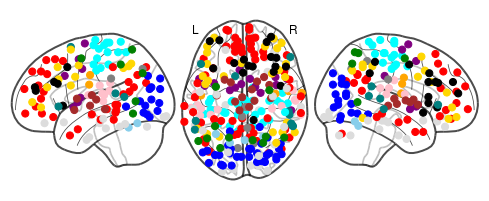

In [4]:
pc = np.zeros((264, 264))
pcol = [x.lower() for x in list(power2011['Color'])]

def colortranslate(x):
    if x.lower() == "yellow":
        return "gold"
    elif x.lower() == "pale blue":
        return "skyblue"
    elif x.lower() == "white":
        return "gainsboro"
    else:
        return x
    
pcol = [colortranslate(x) for x in pcol]
xyz = []
for roi in list(power2011['ROI']):
    entry = power2011.loc[power2011['ROI'] == roi]
    x = int(entry['X'])
    y = int(entry['Y'])
    z = int(entry['Z'])
    xyz.append((x,y,z))
pcoords = np.array(xyz)

img = nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzr')

/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later


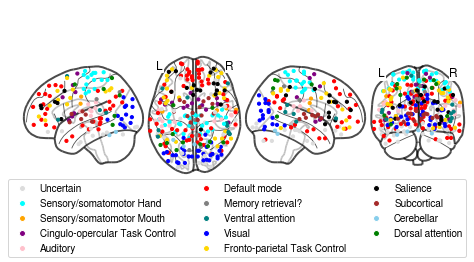

In [5]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
fig, axs = plt.subplots(1,1, figsize=(8,4))
nip.plot_connectome(pc, pcoords, node_color=pcol, display_mode='lzry', axes=axs, node_size=10)

allkols=list(power2011['Color'])
allnets=list(power2011['NetworkName'])

kols=[]
nets=[]
for i in range(len(allkols)):
    if not allkols[i] in kols:
        kols.append(allkols[i])
        nets.append(allnets[i])

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=6) for x in [colortranslate(x) for x in kols]]

fig.legend(handles, nets, loc="lower center", ncol=3)
plt.savefig("figures/power2011.png", figsize=(8, 4), dpi=300)
plt.show()

### Visualize the connectome matrix

We can visualize the connectome matrix for the 62 participants. First, we load the data:

In [6]:
R = np.zeros((264, 264, 61))
PR = np.zeros((264, 264, 61))

index = 0
for ii in range(1, 63):
    subj = "sub-%03d" % (ii,)
    if ii != 8:
        R[:,:,index]=np.loadtxt("../rsfmri/%s/R_py.txt" % (subj,))
        PR[:,:,index]=np.loadtxt("../rsfmri/%s/PR_py.txt" % (subj,))
        index += 1

Then, we visualize it as a matrix

/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/andrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


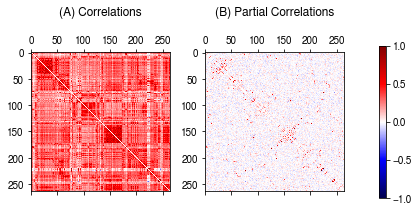

In [9]:

#mR = np.mean(R, 2)
#mPR = np.mean(PR, 2)

# Calculate mean r values using Fisher's Z transform
mR = np.tanh(np.mean((np.log(1+R) - np.log(1-R))/2, 2))
mPR = np.tanh(np.mean((np.log(1+PR) - np.log(1-PR))/2, 2))


for ii in range(264):
    mR[ii,ii] = 0
    mPR[ii,ii] = 0

fig, axs = plt.subplots(1, 3, figsize=(6, 3), gridspec_kw={'width_ratios': [20, 20, 1]})
im = axs[0].matshow(mR, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Correlations\n")
fig.colorbar(im, cax=axs[2])
axs[1].matshow(mPR, vmin=-0.5, vmax=0.5, cmap="seismic")
axs[1].set_title("(B) Partial Correlations\n")
#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/connectomes.png", dpi=300)

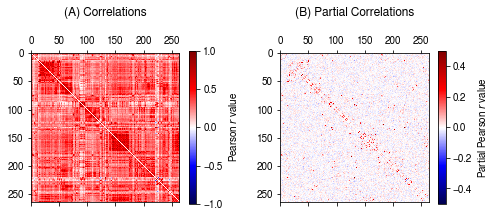

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3))
im = axs[0].matshow(mR, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Correlations\n")
cbar = axs[0].figure.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel(r"Pearson $r$ value", rotation=90, va="top")

im = axs[1].matshow(mPR, vmin=-0.5, vmax=0.5, cmap="seismic")
axs[1].set_title("(B) Partial Correlations\n")
cbar = axs[1].figure.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel(r"Partial Pearson $r$ value", rotation=90, va="top")

#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/connectomes.png", dpi=300)


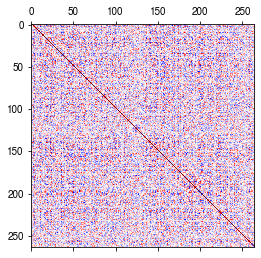

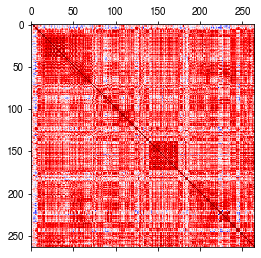

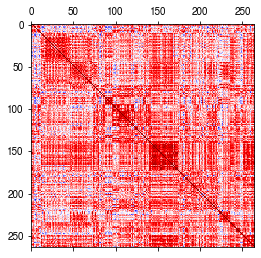

In [134]:
PR1 = np.loadtxt("../rsfmri/sub-004/PR_py.txt")
R1 = np.loadtxt("../rsfmri/sub-006/R_py.txt")
R2 = np.loadtxt("../rsfmri/sub-009/R_py.txt")

plt.matshow(PR1, cmap="seismic", vmax=1, vmin=-1)
plt.matshow(R1, cmap="seismic", vmax=1, vmin=-1)
plt.matshow(R2, cmap="seismic", vmax=1, vmin=-1)

In [44]:
def percent_cutoff(values, cutoff=0.1):
    "Selectes the top <cutoff>% number of values"
    ii = round((1.0 - cutoff) * len(values))
    V = sorted(values)
    return(V[ii])

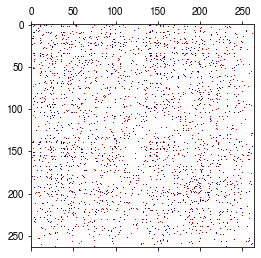

In [34]:
threshold = percent_cutoff(sorted(list(np.abs(PR1.reshape(264*264,1)))))

for i in range(264):
    for j in range(264):
        if i == j:
            PR1[i,j] = 0
        if np.abs(PR1[i,j]) < threshold:
            PR1[i,j] = 0
            
        if power2011.iloc[i,1] * power2011.iloc[j,1] < 0:
            PR1[i, j] = 0
            
plt.matshow(PR1, cmap="seismic", vmax=0.5, vmin=-0.5)

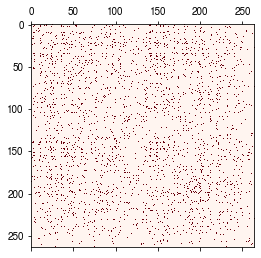

In [35]:
bPR1 = np.copy(PR1)
for i in range(264):
    for j in range(264):
        if bPR1[i,j] != 0:
            bPR1[i,j] = 1

plt.matshow(bPR1, cmap="Reds", vmax=1, vmin=0)          

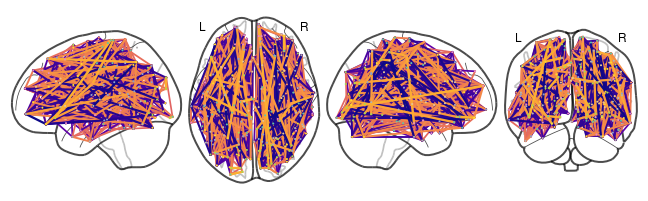

In [36]:
coords = []
colors = []
for i in range(264):
    xyz = (power2011.iloc[i,1], power2011.iloc[i,2], power2011.iloc[i,3])
    coords.append(xyz)
    colors.append(power2011.iloc[i, 5])
    
colors = [x if x != "pale blue" else "dodgerblue" for x in colors]
colors = [x if x != "white" else "grey" for x in colors ]
colors = [x.lower() for x in colors]

nip.plot_connectome(PR1, coords, node_size=1, edge_vmin=-0.5, edge_vmax=0.8, edge_cmap="plasma", edge_threshold="85%", display_mode="lzry", alpha=0.005)

plt.savefig("figures/chantel.png", dpi=300)

In [37]:
np.max(PR1)

0.605959941551028

In [16]:
# Remove things between hemispheres.
power2011.iloc[3,1] * power2011.iloc[4,1]

-448

# Network stuff

In [45]:
rois = []
for i in range(264):
    num, x, y, z, network, color, net_name = power2011.iloc[i,0:7]
    color = color.lower()
    
    hemisphere = "right"
    
    if x < 0:
        hemisphere = "left"
    elif x == 0:
        hemisphere = "bilateral"
        
    if color == "white":
        color = "grey"
        
    if color == "pale blue":
        color = "dodgerblue"
    
    rois.append((num, {"coords" : (x, y, z),
                       "hemisphere" : hemisphere,
                       "network" : net_name,
                       "color" : color}))

Now, we can separate the regions in the left and right hemispheres

In [46]:
rh = [roi[0]-1 for roi in rois if roi[1]['hemisphere'] == 'right']
lh = [roi[0]-1 for roi in rois if roi[1]['hemisphere'] == 'left']

Just to make sure, we can visualize them.

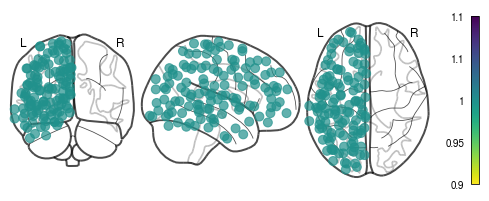

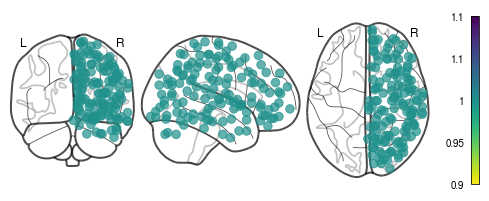

In [47]:
nip.plot_markers([1 for x in range(len(lh))],
                  node_coords=[x[1]['coords'] for x in rois if x[1]['hemisphere'] == 'left'])

nip.plot_markers([1 for x in range(len(rh))],
                  node_coords=[x[1]['coords'] for x in rois if x[1]['hemisphere'] == 'right'])

And now, we can create the connectivity matrices (They are not really used)

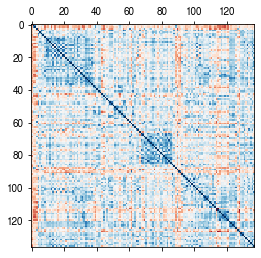

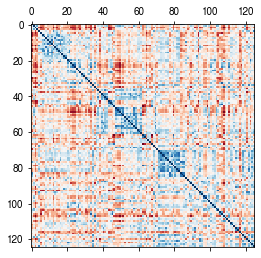

In [135]:
#create matrices

PRright = PR1[np.array(rh)]
PRright = PRright[:, np.array(rh)]
PRleft = PR1[np.array(lh)]
PRleft = PRleft[:,np.array(lh)]

R1right = R1[np.array(rh)]
R1right = R1right[:, np.array(rh)]
R1left = R1[np.array(lh)]
R1left = R1left[:,np.array(lh)]

R2right = R2[np.array(rh)]
R2right = R2right[:, np.array(rh)]
R2left = R2[np.array(lh)]
R2left = R2left[:,np.array(lh)]


plt.matshow(R1right, cmap="RdBu")
plt.matshow(R2left, cmap="RdBu")

## Graph Theory

### Subject 1

First, we need to create Graph objects from our left and right hemisphere regions

In [137]:
rh_threshold = percent_cutoff(list(np.abs(R1right.reshape(R1right.size, 1))))
rh_threshold 

lh_threshold = percent_cutoff(list(np.abs(R1left.reshape(R1left.size, 1))))
lh_threshold 

array([0.55386993])

In [138]:
rh_rois = [x for x in rois if x[1]['hemisphere']=="right"]
lh_rois = [x for x in rois if x[1]['hemisphere']=="left"]

Gr = nx.Graph()
Gr.add_nodes_from(rh_rois)

for x in rh_rois:
    for y in rh_rois: 
        i = x[0] - 1
        j = y[0] - 1
        if abs(R1[i,j]) > rh_threshold and i != j:
            Gr.add_edge(x[0], y[0])


Gl = nx.Graph()
Gl.add_nodes_from(lh_rois)

for x in lh_rois:
    for y in lh_rois: 
        i = x[0] - 1
        j = y[0] - 1
        if abs(R1[i,j]) > lh_threshold and i != j:
            Gl.add_edge(x[0], y[0])


Now, let's visualize them as circle networks.

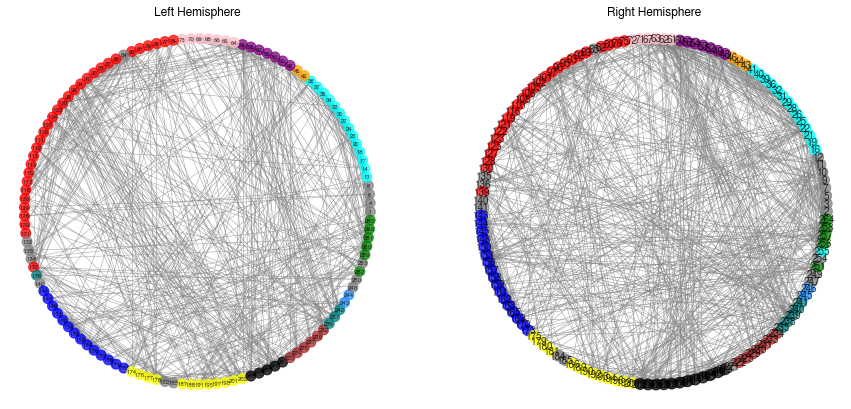

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(15,7.))
plt.subplot(ax[1])
nx.draw_circular(Gr, with_labels=True, 
                 node_color=[x[1]['color'] for x in rh_rois],
                edge_color="grey", width=0.5,
                node_size=120, font_size=10, alpha=.75)
ax[1].set_title("Right Hemisphere")
plt.subplot(ax[0])
nx.draw_circular(Gl, with_labels=True,
                node_color=[x[1]['color'] for x in lh_rois],
                edge_color="grey", width=0.5,
                node_size=100, font_size=6, alpha=.75)
ax[0].set_title("Left Hemisphere")
plt.savefig("figures/LRH_sub-006.png")
plt.show()

### Statistics

Let's calculate and visualize the clustering coefficient

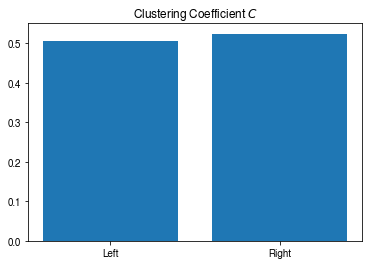

In [140]:
plt.bar([1,2],
        [nx.average_clustering(Gl),
         nx.average_clustering(Gr)],
        tick_label=("Left", "Right"))
plt.title("Clustering Coefficient $C$")
plt.savefig("figures/clustering_subj-006.png", dpi=300)
plt.show()

Now the average shortest path length. Before doing that, we need to remove the isolated nodes.

In [141]:
iso=[]
for n in nx.isolates(Gl):
    iso.append(n)

print(iso)
Gl.remove_nodes_from(iso)

iso=[]
for n in nx.isolates(Gr):
    iso.append(n)

Gr.remove_nodes_from(iso)
print(iso)

[132]
[2, 102, 221]


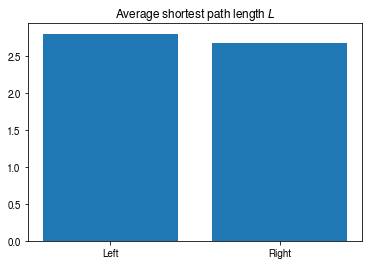

In [142]:
plt.bar([1,2], 
        [nx.average_shortest_path_length(Gl),
         nx.average_shortest_path_length(Gr)],
        tick_label=("Left", "Right"))
plt.title("Average shortest path length $L$")
plt.savefig("figures/pathlength_subj-006.png", dpi=300)
plt.show()

### Subject sub-009

Now we repeat the analysis for subject 009.

In [144]:
rh_threshold = percent_cutoff(list(np.abs(R2right.reshape(R2right.size, 1))))
rh_threshold 

lh_threshold = percent_cutoff(list(np.abs(R2left.reshape(R2left.size, 1))))
lh_threshold 

rh_rois = [x for x in rois if x[1]['hemisphere']=="right"]
lh_rois = [x for x in rois if x[1]['hemisphere']=="left"]

Gr = nx.Graph()
Gr.add_nodes_from(rh_rois)

for x in rh_rois:
    for y in rh_rois: 
        i = x[0] - 1
        j = y[0] - 1
        if abs(R2[i,j]) > rh_threshold and i != j:
            Gr.add_edge(x[0], y[0])


Gl = nx.Graph()
Gl.add_nodes_from(lh_rois)

for x in lh_rois:
    for y in lh_rois: 
        i = x[0] - 1
        j = y[0] - 1
        if abs(R2[i,j]) > lh_threshold and i != j:
            Gl.add_edge(x[0], y[0])

Graphs and statistics

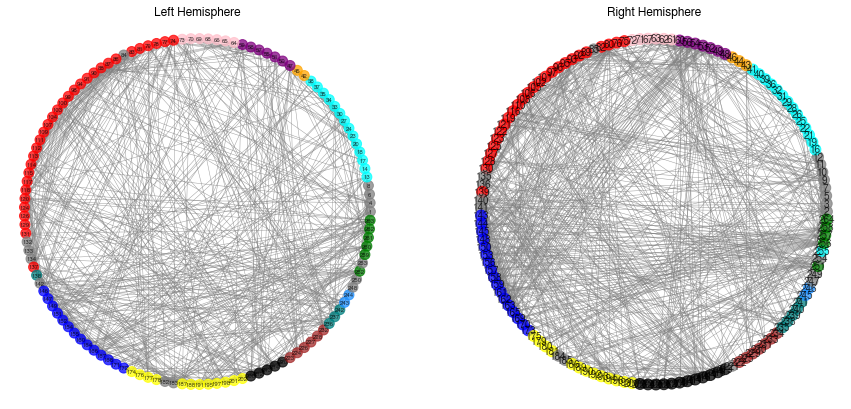

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(15,7.))
plt.subplot(ax[1])
nx.draw_circular(Gr, with_labels=True, 
                 node_color=[x[1]['color'] for x in rh_rois],
                edge_color="grey", width=0.5,
                node_size=120, font_size=10, alpha=.75)
ax[1].set_title("Right Hemisphere")
plt.subplot(ax[0])
nx.draw_circular(Gl, with_labels=True,
                node_color=[x[1]['color'] for x in lh_rois],
                edge_color="grey", width=0.5,
                node_size=100, font_size=6, alpha=.75)
ax[0].set_title("Left Hemisphere")
plt.savefig("figures/LRH_sub-009.png")
plt.show()

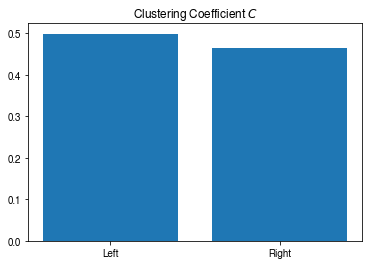

In [148]:
plt.bar([1,2],
        [nx.average_clustering(Gl),
         nx.average_clustering(Gr)],
        tick_label=("Left", "Right"))
plt.title("Clustering Coefficient $C$")
plt.savefig("figures/clustering_subj-009.png", dpi=300)
plt.show()

[248]
[207, 247]


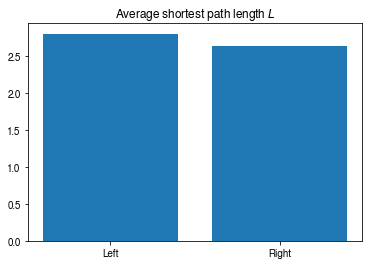

In [149]:
iso=[]
for n in nx.isolates(Gl):
    iso.append(n)

print(iso)
Gl.remove_nodes_from(iso)

iso=[]
for n in nx.isolates(Gr):
    iso.append(n)

Gr.remove_nodes_from(iso)
print(iso)

plt.bar([1,2], 
        [nx.average_shortest_path_length(Gl),
         nx.average_shortest_path_length(Gr)],
        tick_label=("Left", "Right"))
plt.title("Average shortest path length $L$")
plt.savefig("figures/pathlength_subj-009.png", dpi=300)
plt.show()

Connectome

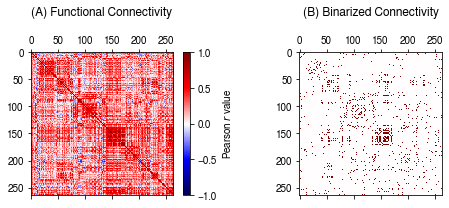

In [167]:
sparseC = np.zeros((264, 264))

for i in range(264):
    for j in range(264):
        if (i, j) in Gr.edges or (i, j) in Gl.edges or (j, i) in Gr.edges or (j, i) in Gl.edges:
            sparseC[i,j] = 1
            sparseC[j,i] = 1

fig, axs = plt.subplots(1, 2, figsize=(7, 3))
im = axs[0].matshow(R2, vmin=-1, vmax=1, cmap="seismic")
axs[0].set_title("(A) Functional Connectivity\n")
cbar = axs[0].figure.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel(r"Pearson $r$ value", rotation=90, va="top")

im = axs[1].matshow(sparseC, vmin=-1, vmax=1, cmap="seismic")
axs[1].set_title("(B) Binarized Connectivity\n")
#cbar = axs[1].figure.colorbar(im, ax=axs[1])
#cbar.ax.set_ylabel(r"Presence of Edge", rotation=90, va="top")

#axs[2].set_visible(False)
plt.tight_layout()
plt.savefig("figures/single_person_connectome.png", dpi=300)



# All subjects



sub-001
(1072, 804)
sub-002
(453, 565)


NetworkXError: Graph is not connected.

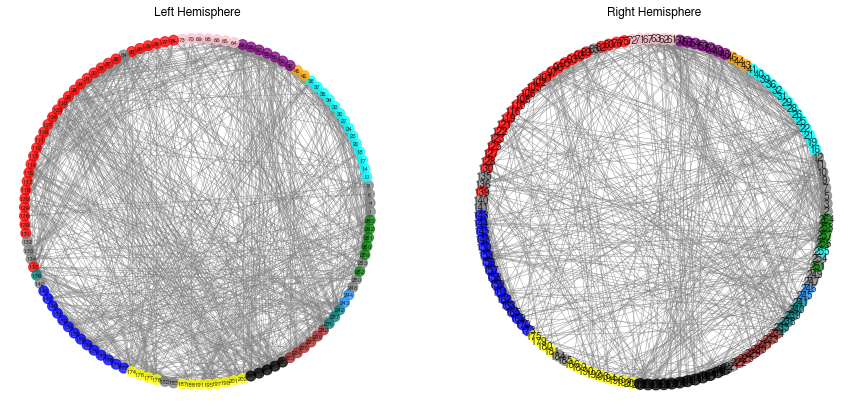

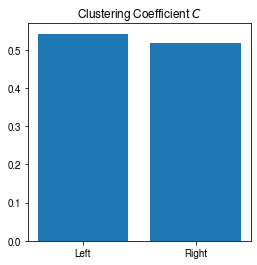

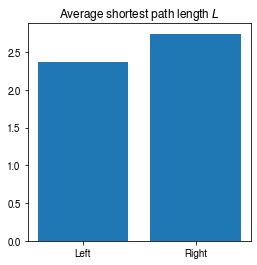

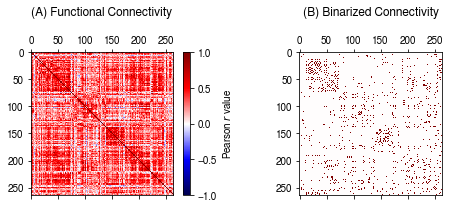

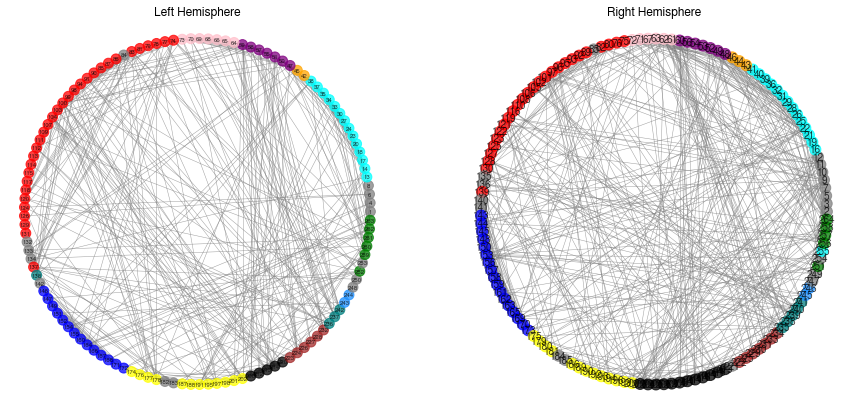

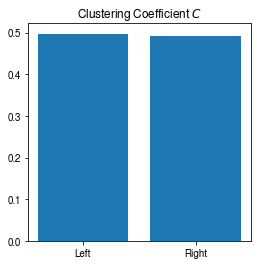

In [173]:
rois = []
for i in range(264):
    num, x, y, z, network, color, net_name = power2011.iloc[i,0:7]
    color = color.lower()
    
    hemisphere = "right"
    
    if x < 0:
        hemisphere = "left"
    elif x == 0:
        hemisphere = "bilateral"
        
    if color == "white":
        color = "grey"
        
    if color == "pale blue":
        color = "dodgerblue"
    
    rois.append((num, {"coords" : (x, y, z),
                       "hemisphere" : hemisphere,
                       "network" : net_name,
                       "color" : color}))

rh_rois = [x for x in rois if x[1]['hemisphere']=="right"]
lh_rois = [x for x in rois if x[1]['hemisphere']=="left"]
    
rh = [roi[0]-1 for roi in rois if roi[1]['hemisphere'] == 'right']
lh = [roi[0]-1 for roi in rois if roi[1]['hemisphere'] == 'left']
    
stats = np.zeros((63, 4))

for ii in range(1, 63):
    subj = "sub-%03d" % (ii,)
    print(subj)
    if ii != 8:
        R = np.loadtxt("../rsfmri/%s/R_py.txt" % (subj,))

        # Calculate thresholds by hemisphere
        Rright = R[np.array(rh)]
        Rright = Rright[:, np.array(rh)]
        Rleft = R[np.array(lh)]
        Rleft = Rleft[:,np.array(lh)]

        rh_threshold = percent_cutoff(list(np.abs(Rright.reshape(Rright.size, 1))))
        rh_threshold 

        lh_threshold = percent_cutoff(list(np.abs(Rleft.reshape(Rleft.size, 1))))
        lh_threshold 

        # Create the graphs
        
        Gr = nx.Graph()
        Gr.add_nodes_from(rh_rois)

        for x in rh_rois:
            for y in rh_rois: 
                i = x[0] - 1
                j = y[0] - 1
                if abs(R[i,j]) > rh_threshold and i != j:
                    Gr.add_edge(x[0], y[0])


        Gl = nx.Graph()
        Gl.add_nodes_from(lh_rois)

        for x in lh_rois:
            for y in lh_rois: 
                i = x[0] - 1
                j = y[0] - 1
                if abs(R[i,j]) > lh_threshold and i != j:
                    Gl.add_edge(x[0], y[0])

        print("(%d, %d)" % (len(Gl.edges), len(Gr.edges)))
        # Plot and draw network measures
        
        fig, ax = plt.subplots(1, 2, figsize=(15,7.))
        plt.subplot(ax[1])
        nx.draw_circular(Gr, with_labels=True, 
                         node_color=[x[1]['color'] for x in rh_rois],
                        edge_color="grey", width=0.5,
                        node_size=120, font_size=10, alpha=.75)
        ax[1].set_title("Right Hemisphere")
        plt.subplot(ax[0])
        nx.draw_circular(Gl, with_labels=True,
                        node_color=[x[1]['color'] for x in lh_rois],
                        edge_color="grey", width=0.5,
                        node_size=100, font_size=6, alpha=.75)
        ax[0].set_title("Left Hemisphere")
        
        plt.savefig("subjects/LRH_sub-%03d.png" % ii, dpi=300)
        
        # Clustering coefficient
        
        Cl = nx.average_clustering(Gl)
        Cr = nx.average_clustering(Gr)
        
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        plt.subplot(ax)
        plt.bar([1, 2],
                [Cl, Cr],
                tick_label=("Left", "Right"))
        plt.title("Clustering Coefficient $C$")
        plt.savefig("subjects/clustering_subj-%03d.png" % ii, dpi=300)

        # Path lengths
        
        iso=[]
        for n in nx.isolates(Gl):
            iso.append(n)

        Gl.remove_nodes_from(iso)

        for n in nx.isolates(Gr):
            iso.append(n)

        Gr.remove_nodes_from(iso)

        Ll = nx.average_shortest_path_length(Gl)
        Lr = nx.average_shortest_path_length(Gr)
        
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        plt.subplot(ax)
        plt.bar([1,2], 
                [Ll, Lr],
                tick_label=("Left", "Right"))
        plt.title("Average shortest path length $L$")
        plt.savefig("subjects/pathlength_subj-%03d.png" % ii, dpi=300)

        # Save stats
        
        stats[ii,] = [Cl, Cr, Ll, Lr]
        
        # Visualize connectomes and sparse matrices
        
        sparseC = np.zeros((264, 264))

        for i in range(264):
            for j in range(264):
                if (i, j) in Gr.edges or (i, j) in Gl.edges or (j, i) in Gr.edges or (j, i) in Gl.edges:
                    sparseC[i,j] = 1
                    sparseC[j,i] = 1

        fig, axs = plt.subplots(1, 2, figsize=(7, 3))
        im = axs[0].matshow(R, vmin=-1, vmax=1, cmap="seismic")
        axs[0].set_title("(A) Functional Connectivity\n")
        cbar = axs[0].figure.colorbar(im, ax=axs[0])
        cbar.ax.set_ylabel(r"Pearson $r$ value", rotation=90, va="top")

        im = axs[1].matshow(sparseC, vmin=-1, vmax=1, cmap="seismic")
        axs[1].set_title("(B) Binarized Connectivity\n")
        plt.tight_layout()
        plt.savefig("subjects/connectome_sub-%03d.png" % ii, dpi=300)



## Small-World Measures

In [176]:
plt.bar([1,2], 
        [nx.sigma(Gl),
         nx.sigma(Gr)],
        tick_label=("Left", "Right"))
plt.title("Small-world index $\sigma$")
plt.show()

KeyboardInterrupt: 